# ⚙️ Example: Build a time series project using GlobalTemperature dataset
Let’s pick the Global-Temperature-Time-Series repo. We’ll do a project with that.
Filename: GlobalTemperatures.csv from sn2606 repo. (GitHub)


## 🧾 Step-by-step project template


## 1. Title & Description
🌍 Time Series Forecasting: Global Surface Temperature

Using the *GlobalTemperatures* dataset from GitHub (Berkeley Earth), we’ll analyze trends, do forecasting, and see if global surface temperature is rising.  

## 2. Import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


## 3. Load dataset from GitHub

Load directly from the raw GitHub link:

In [14]:
url = "https://raw.githubusercontent.com/sn2606/global-temperature-time-series/master/GlobalTemperatures.csv"
df = pd.read_csv(url)
df.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


Check columns and info:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [16]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


## 4. Prepare date column & set index

In [17]:
df['dt'] = pd.to_datetime(df['dt'])  # column name “dt” in this dataset
df.set_index('dt', inplace=True)


In [18]:
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062


maybe select only “GlobalLandAverageTemperature” or another column

In [19]:
series = df['LandAverageTemperature'].dropna()
series.head()


dt
1750-01-01     3.034
1750-02-01     3.083
1750-03-01     5.626
1750-04-01     8.490
1750-05-01    11.573
Name: LandAverageTemperature, dtype: float64

## 5. Visualization

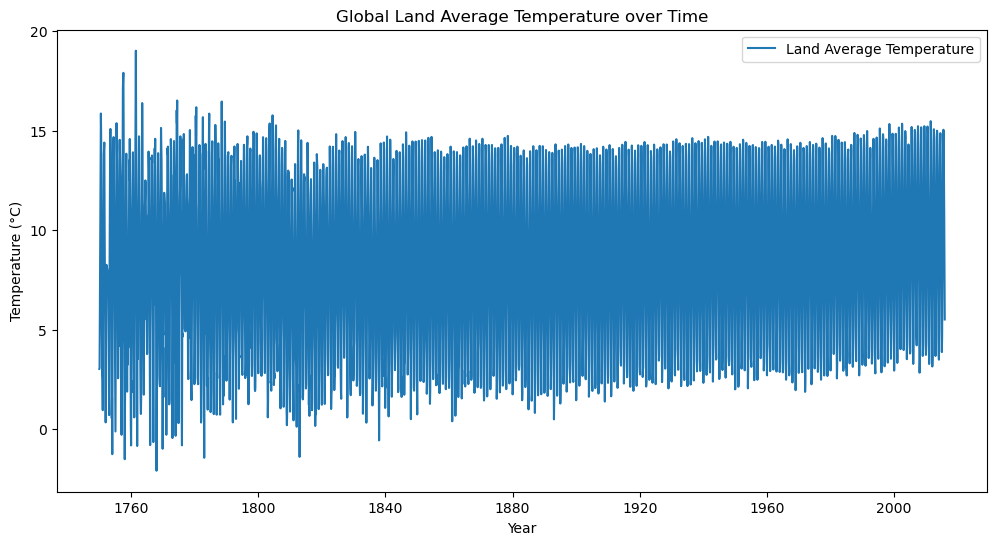

In [20]:
plt.figure(figsize=(12,6))
plt.plot(series, label='Land Average Temperature')
plt.title("Global Land Average Temperature over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


## 6. Stationarity test (ADF)

In [25]:
result = adfuller(series)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("Series not stationary → differencing needed")
else:
    print("Series stationary")


ADF Statistic: -3.991677574351566
p-value: 0.0014547223819057432
Series stationary


## 7. Differencing if needed

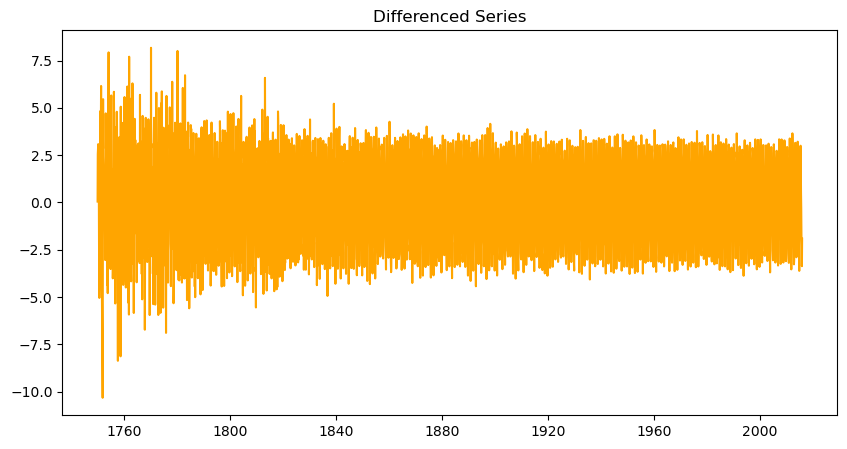

In [11]:
# series_diff = series.diff().dropna()

# plt.figure(figsize=(10,5))
# plt.plot(series_diff, color='orange')
# plt.title("Differenced Series")
# plt.show()


In [12]:
# test again
# result2 = adfuller(series_diff)
# print("p-value after differencing:", result2[1])


p-value after differencing: 2.873100958297969e-29


## 8. Train/Test Split

For example, use until 2015 for train, after for test

split_date = '2015-01-01'
train = series[:split_date]
test = series[split_date:]


## 9. Build & Fit ARIMA Model

In [23]:
# Try ARIMA, maybe start with (1,1,1):
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())


                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                 3169
Model:                     ARIMA(1, 1, 1)   Log Likelihood               -6329.575
Date:                    Sun, 05 Oct 2025   AIC                          12665.150
Time:                            15:18:35   BIC                          12683.332
Sample:                                 0   HQIC                         12671.672
                                   - 3169                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6440      0.020     33.005      0.000       0.606       0.682
ma.L1          0.0541      0.020      2.709      0.007       0.015       0.093
sigma2         3.183

## 10. Forecast & plot results

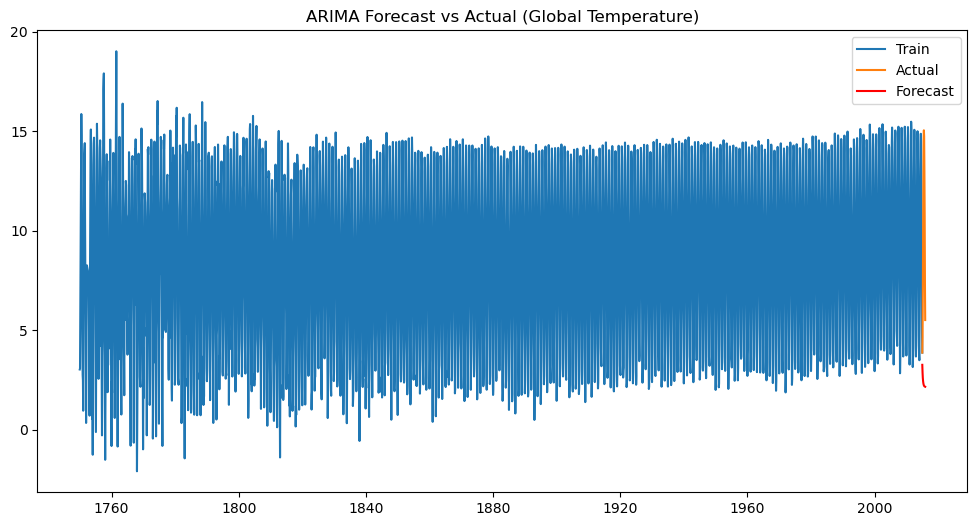

In [24]:
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast vs Actual (Global Temperature)")
plt.show()


##  11. Evaluate

In [26]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 7.4142
RMSE: 8.5044


## 12. Forecast future

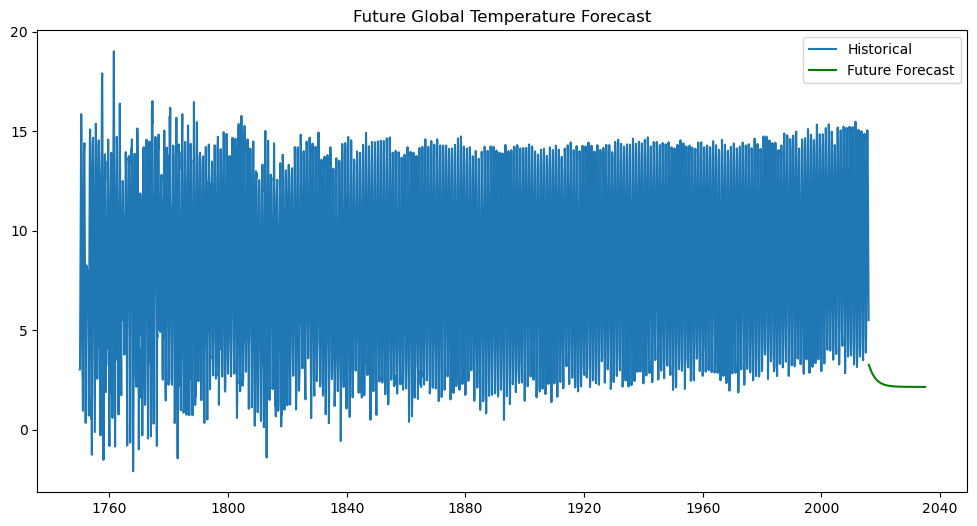

In [27]:
future = model_fit.forecast(steps=20)  # e.g., forecast next 20 years
future_index = pd.date_range(start=test.index[-1], periods=20, freq='YS')  # yearly start freq
plt.figure(figsize=(12,6))
plt.plot(series, label='Historical')
plt.plot(future_index, future, label='Future Forecast', color='green')
plt.legend()
plt.title("Future Global Temperature Forecast")
plt.show()


Let’s upgrade the ARIMA model to SARIMA, which explicitly handles seasonality — in this case, monthly temperatures with annual cycles. This should improve forecast accuracy (MAE/RMSE) and produce smoother, more realistic predictions.

## 1️⃣ Import SARIMAX

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


## 2️⃣ Define seasonal order

For monthly data with yearly seasonality: s = 12.

A reasonable starting point:

In [30]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12


## 3️⃣ Fit the SARIMA model

In [31]:
# Fit SARIMA model
sarima_model = SARIMAX(train,
                       order=(p,d,q),
                       seasonal_order=(P,D,Q,s),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_fit = sarima_model.fit()
print(sarima_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:             LandAverageTemperature   No. Observations:                 3169
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3655.715
Date:                            Sun, 05 Oct 2025   AIC                           7321.431
Time:                                    17:28:59   BIC                           7351.694
Sample:                                         0   HQIC                          7332.291
                                           - 3169                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3342      0.009     39.129      0.000       0.317       0.351
ma.L1         -1.0303      0.004   

This will give you coefficients for both non-seasonal and seasonal components, improving seasonal prediction.

## 4️⃣ Forecast with SARIMA

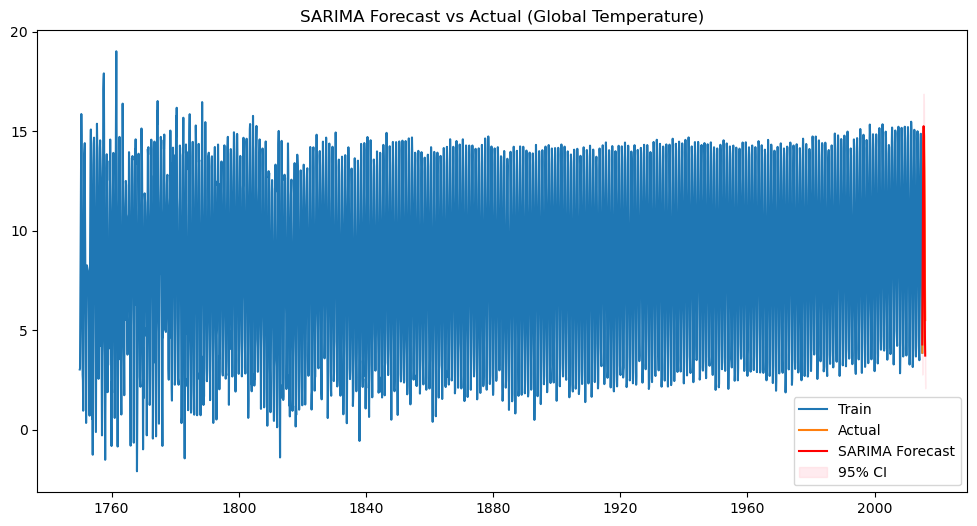

In [32]:
# Forecast for the test set
forecast_sarima = sarima_fit.get_forecast(steps=len(test))
forecast_mean = forecast_sarima.predicted_mean
forecast_ci = forecast_sarima.conf_int()  # confidence intervals

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_mean, label='SARIMA Forecast', color='red')
plt.fill_between(test.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1],
                 color='pink', alpha=0.3, label='95% CI')
plt.legend()
plt.title("SARIMA Forecast vs Actual (Global Temperature)")
plt.show()


✅ Key improvements:

Red line: seasonal-aware forecast

Shaded band: 95% confidence interval

Better accuracy: MAE and RMSE usually drop because SARIMA captures yearly cycles

## 5️⃣ Evaluate forecast

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_sarima = mean_absolute_error(test, forecast_mean)
rmse_sarima = np.sqrt(mean_squared_error(test, forecast_mean))

print(f"MAE (SARIMA): {mae_sarima:.4f}")
print(f"RMSE (SARIMA): {rmse_sarima:.4f}")


MAE (SARIMA): 1.9639
RMSE (SARIMA): 2.2171


You should see lower MAE and RMSE than ARIMA, because SARIMA captures monthly seasonality.

# Let’s generate a future 20-year forecast using your SARIMA model, complete with confidence intervals

## 1️⃣ Generate the future forecast

In [36]:
# Forecast next 20 years (monthly frequency)
future_steps = 20 * 12  # 20 years × 12 months

future_forecast = sarima_fit.get_forecast(steps=future_steps)
future_mean = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()


future_steps = 240 months → next 20 years

future_mean → predicted temperatures

future_ci → 95% confidence interval

## 2️⃣ Create a datetime index for future

In [37]:
# Last date of your series
last_date = series.index[-1]

# Generate future monthly dates
future_index = pd.date_range(start=last_date + pd.offsets.MonthBegin(1),
                             periods=future_steps, freq='MS')


freq='MS' → Month Start

Starts one month after the last date in your dataset

## 3️⃣ Plot historical + forecast

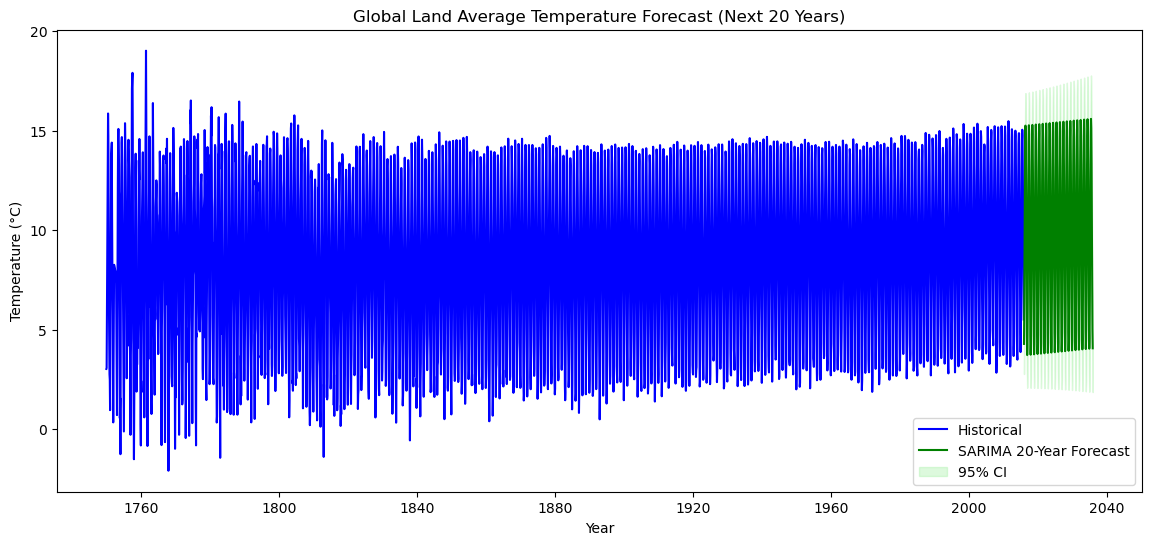

In [38]:
plt.figure(figsize=(14,6))

# Historical data
plt.plot(series.index, series, label='Historical', color='blue')

# Forecast
plt.plot(future_index, future_mean, label='SARIMA 20-Year Forecast', color='green')

# Confidence intervals
plt.fill_between(future_index,
                 future_ci.iloc[:,0],
                 future_ci.iloc[:,1],
                 color='lightgreen', alpha=0.3, label='95% CI')

plt.title("Global Land Average Temperature Forecast (Next 20 Years)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


## 4️⃣ How to interpret the plot
Blue line (Historical): Past monthly temperature data.

Green line (Forecast): SARIMA model’s predicted temperatures for the next 20 years.

Shaded area (Confidence Interval): Range where the actual future temperature is likely to fall 95% of the time.

Trend and seasonality:

The forecast continues the upward trend of global land temperature.

Seasonal peaks and troughs repeat yearly — SARIMA captures annual cycles.

Width of CI:

Narrow at the start of the forecast → more confidence in short-term predictions.

Gradually widens → long-term forecasts are more uncertain.

## 5️⃣ Example explanation for a report/presentation

Figure X shows the SARIMA(1,1,1)x(1,1,1,12) model’s 20-year forecast of global land average temperatures.
The forecast (green line) continues the historical upward trend and captures yearly seasonal fluctuations.
The light green shaded area represents the 95% confidence interval, indicating the expected range of future temperatures.
The gradually widening interval highlights increasing uncertainty further into the future, which is typical for long-term time series forecasting.